In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

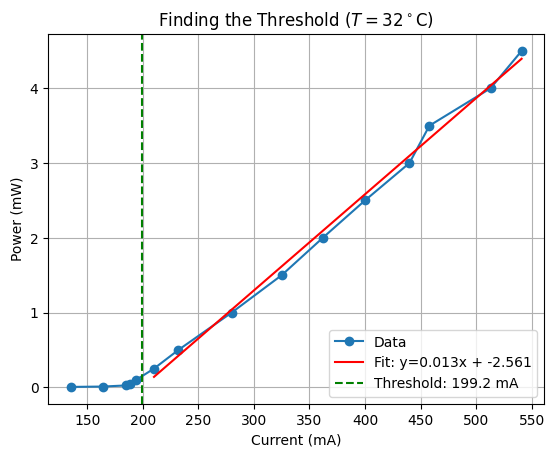

Slope: 0.013
Intercept: -2.561
Threshold Current: 199.2 mA


In [4]:
# Data
current = np.array([135, 164, 185, 188, 194, 210, 232, 280, 325, 362, 400, 440, 458, 513, 541])
power = np.array([0.005, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5])

# Choose the linear part of the data manually
# Visual inspection suggests linearity from index 5 to 14 (194 mA to 541 mA)
linear_current = current[5:]
linear_power = power[5:]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(linear_current, linear_power)

# Find the threshold (intercept on the x-axis)
threshold_current = -intercept / slope

# Plotting
plt.plot(current, power, label="Data", linestyle='-', marker='o')
plt.plot(linear_current, slope * linear_current + intercept, 
         label=f"Fit: y={slope:.3f}x + {intercept:.3f}", color="red")
plt.axvline(x=threshold_current, color="green", linestyle="--", label=f"Threshold: {threshold_current:.1f} mA")
plt.xlabel("Current (mA)")
plt.ylabel("Power (mW)")
plt.title("Finding the Threshold ($T= 32^\circ$C)")
plt.grid()
plt.legend()
plt.show()

# Print results
print(f"Slope: {slope:.3f}")
print(f"Intercept: {intercept:.3f}")
print(f"Threshold Current: {threshold_current:.1f} mA")


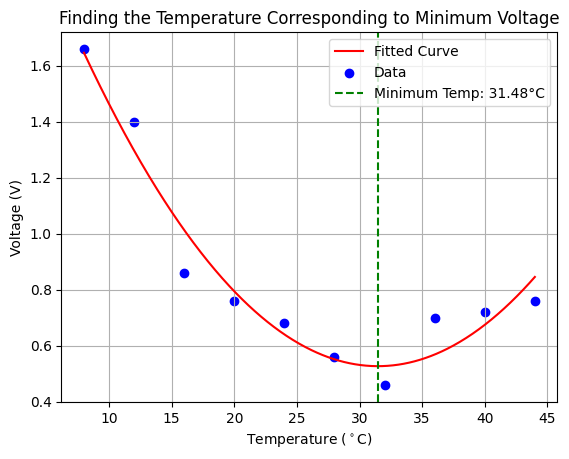

Fitted Quadratic Equation: V = 2.031e-03T² + -1.279e-01T + 2.539e+00
Minimum Voltage: 0.527 V at Temperature: 31.48°C


In [13]:
# Data
Temp = np.array([8, 12, 16, 20, 24, 28, 32, 36, 40, 44])
Volt = np.array([1.66, 1.40, 0.86, 0.76, 0.68, 0.56, 0.46, 0.7, 0.72, 0.76])

# Fit a quadratic curve (y = ax^2 + bx + c)
coefficients = np.polyfit(Temp, Volt, 2)  # Returns [a, b, c]
a, b, c = coefficients

# Generate the quadratic curve
Temp_fine = np.linspace(Temp.min(), Temp.max(), 500)  # More points for smooth curve
Volt_fitted = np.polyval(coefficients, Temp_fine)

# Find the minimum of the parabola
Temp_min = -b / (2 * a)  # x-coordinate of vertex
Volt_min = np.polyval(coefficients, Temp_min)  # y-coordinate of vertex

# Plot
plt.plot(Temp_fine, Volt_fitted, label='Fitted Curve', color='red')
plt.scatter(Temp, Volt, label='Data', color='blue')
plt.axvline(Temp_min, color='green', linestyle='--', label=f'Minimum Temp: {Temp_min:.2f}°C')
plt.xlabel("Temperature ($^\circ$C)")
plt.ylabel("Voltage (V)")
plt.title("Finding the Temperature Corresponding to Minimum Voltage")
plt.grid()
plt.legend()
plt.show()

# Print results
print(f"Fitted Quadratic Equation: V = {a:.3e}T² + {b:.3e}T + {c:.3e}")
print(f"Minimum Voltage: {Volt_min:.3f} V at Temperature: {Temp_min:.2f}°C")



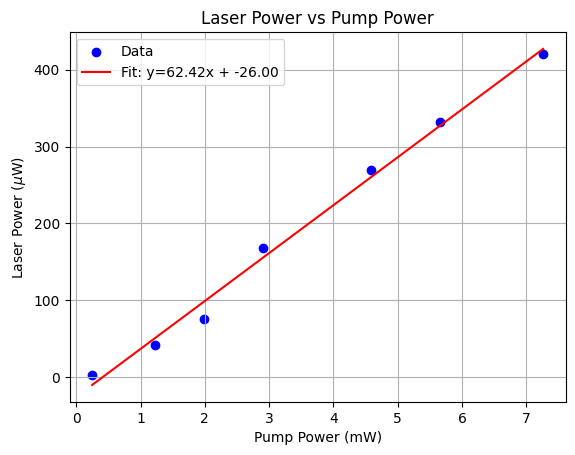

Slope: 62.42 $\mu$W/mW
Intercept: -26.00 mW
R-squared: 0.993


In [14]:
# Data
pump = np.array([7.26, 5.66, 4.58, 2.91, 1.98, 1.23, 0.248])
laser = np.array([420, 332, 269, 168, 75, 42, 1.8])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(pump, laser)

# Generate regression line
regression_line = slope * pump + intercept

# Plot
plt.scatter(pump, laser, label="Data", color="blue", marker='o')
plt.plot(pump, regression_line, label=f"Fit: y={slope:.2f}x + {intercept:.2f}", color="red")
plt.xlabel("Pump Power (mW)")
plt.ylabel("Laser Power ($\mu$W)")
plt.title("Laser Power vs Pump Power")
plt.grid()
plt.legend()
plt.show()

# Print results
print(f"Slope: {slope:.2f} $\mu$W/mW")
print(f"Intercept: {intercept:.2f} mW")
print(f"R-squared: {r_value**2:.3f}")
